In [ ]:
import pandas as pd
data=pd.read_csv('D:\\Python\\Football_injury.csv')
print(data.head())



            p_id2  start_year  season_days_injured  total_days_injured  \
0   aaronconnolly        2019                   13                 161   
1   aaronconnolly        2020                   71                 161   
2  aaroncresswell        2016                   95                 226   
3  aaroncresswell        2018                   87                 226   
4  aaroncresswell        2019                   35                 226   

   season_minutes_played  season_games_played  season_matches_in_squad  \
0                 1312.0                   24                       28   
1                  836.0                   17                       28   
2                 2247.0                   26                       27   
3                 1680.0                   20                       27   
4                 2870.0                   31                       31   

   total_minutes_played  total_games_played         dob  ...  \
0                2148.0                  41  2

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   p_id2                              1301 non-null   object 
 1   start_year                         1301 non-null   int64  
 2   season_days_injured                1301 non-null   int64  
 3   total_days_injured                 1301 non-null   int64  
 4   season_minutes_played              1301 non-null   float64
 5   season_games_played                1301 non-null   int64  
 6   season_matches_in_squad            1301 non-null   int64  
 7   total_minutes_played               1301 non-null   float64
 8   total_games_played                 1301 non-null   int64  
 9   dob                                1301 non-null   object 
 10  height_cm                          1301 non-null   float64
 11  weight_kg                          1301 non-null   float

In [14]:
target = 'significant_injury_prev_season' 

if data[target].nunique() <= 10: 
    problem_type = 'Classification'
else:
    problem_type = 'Regression'

print(f"Problem Type: {problem_type}")


Problem Type: Classification


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with median
imputer_num = SimpleImputer(strategy='median')
data[num_cols] = imputer_num.fit_transform(data[num_cols])

# For categorical columns, check for empty columns and remove them
empty_cats = [col for col in cat_cols if data[col].nunique() == 0]
if empty_cats:
    print(f"Removing empty categorical columns: {empty_cats}")
    cat_cols = [col for col in cat_cols if col not in empty_cats]

# Ensure categorical columns have valid data and impute missing values
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data[cat_cols] = data[cat_cols].astype(str)  # Convert to strings for consistency
    data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

    # Encode categorical features using LabelEncoder
    encoder = LabelEncoder()
    for col in cat_cols:
        data[col] = encoder.fit_transform(data[col])

# Normalize numerical columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print("Data preprocessing completed.")


Data preprocessing completed.


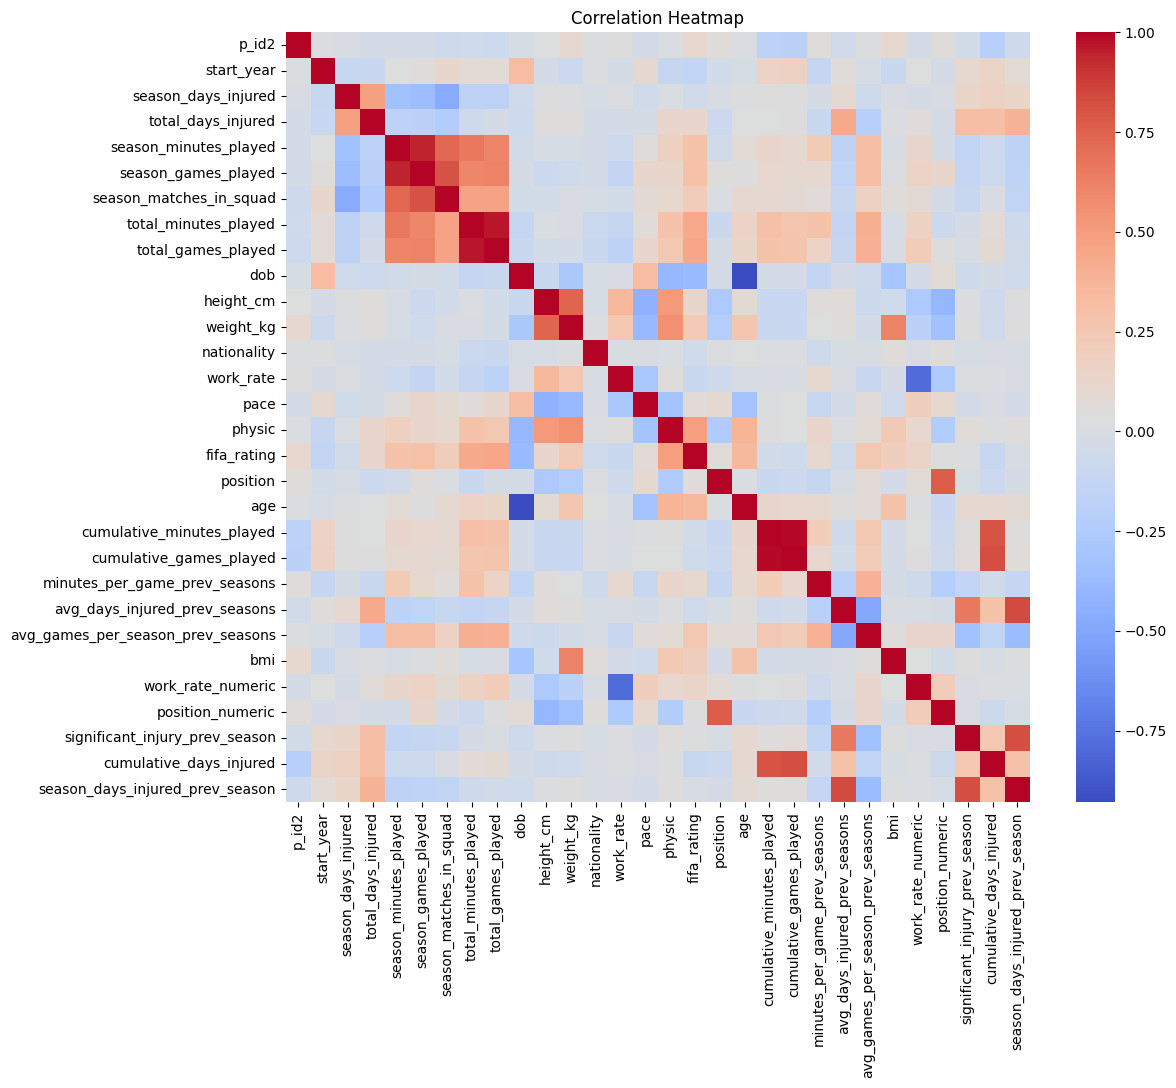

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Feature Importances')

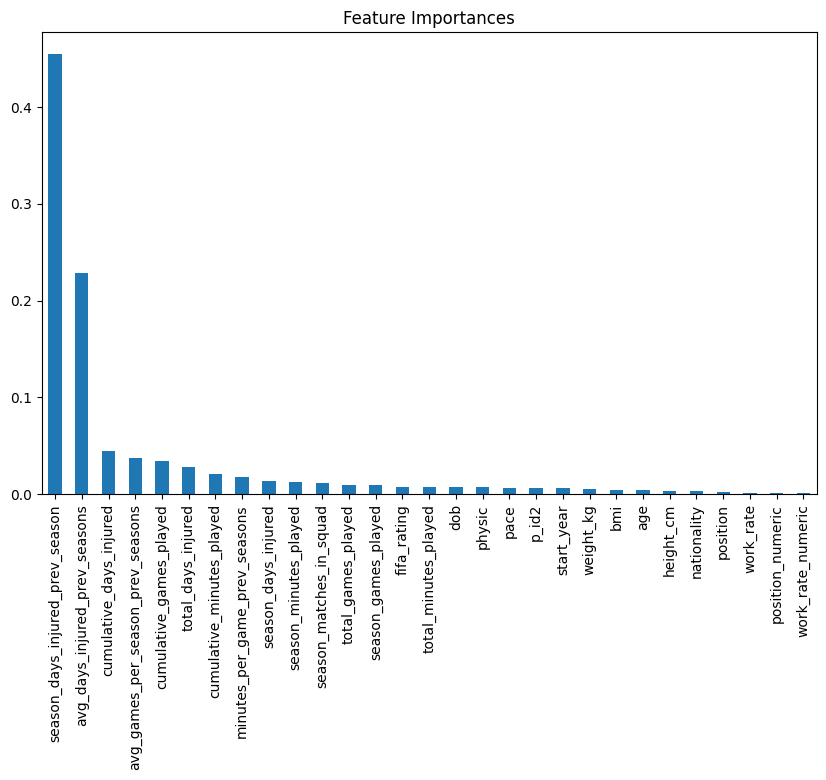

In [40]:
X = data.drop(columns=[target]) 
y = data[target] # Convert target to categorical if it's not already 
if y.dtype.kind in 'iufc': 
    y = pd.cut(y, bins=3, labels=["low", "medium", "high"]) # Example for continuous targets, adjust bins and labels as needed 
model = RandomForestClassifier(random_state=42) 
model.fit(X, y) 
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 
plt.figure(figsize=(10, 6)) 
importances.plot(kind='bar') 
plt.title('Feature Importances')

In [41]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)
print("Model initialized.")


Model initialized.


In [43]:
# Train the model
model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [44]:
# Make predictions
y_pred = model.predict(X_test)
print("Model testing completed.")


Model testing completed.


In [45]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        26
         low       1.00      1.00      1.00       235

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



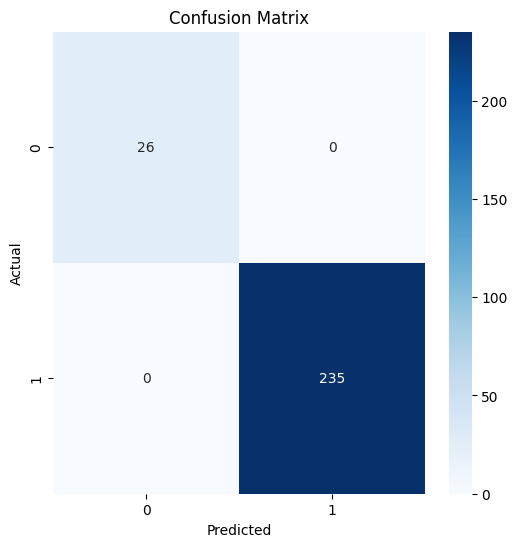

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

if abs(train_score - test_score) > 0.1:
    print("The model may be overfitting or underfitting.")
else:
    print("The model has good generalization.")


Training Accuracy: 1.00
Testing Accuracy: 1.00
The model has good generalization.


In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and retrain
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate final model
final_accuracy = best_model.score(X_test, y_test)
print(f"Final Accuracy after Hyperparameter Tuning: {final_accuracy:.2f}")


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Final Accuracy after Hyperparameter Tuning: 1.00
